# Importing libraries

In [2]:
# Data processing  
# -----------------------------------------------------------------------  
import pandas as pd  
import numpy as np

# Pandas options  
# -----------------------------------------------------------------------  
pd.options.display.max_colwidth = None
 
# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append('../')  # Adds the parent directory to the path for custom module imports  

# Ignore warnings  
# -----------------------------------------------------------------------  
import warnings  
warnings.filterwarnings("ignore")

# Custom functions
# -----------------------------------------------------------------------
from src.support_eda import *

# Data loading

In [3]:
df = pd.read_csv("../data/raw/Global_Superstore.csv", encoding='latin-1')

First, we rename the columns to remove the spaces.

In [4]:
df.columns = [col.replace(' ', '') for col in df.columns]

df.columns

Index(['RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode', 'CustomerID',
       'CustomerName', 'Segment', 'City', 'State', 'Country', 'PostalCode',
       'Market', 'Region', 'ProductID', 'Category', 'Sub-Category',
       'ProductName', 'Sales', 'Quantity', 'Discount', 'Profit',
       'ShippingCost', 'OrderPriority'],
      dtype='object')

In [5]:
df.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wireless Headset System,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


Duplicate check.

In [6]:
df.duplicated().sum()

0

We don't have any duplicates.

## Important

The data appears to consist of a table where each row represents a transaction, but we also have information about orders, customers, and products. If we want to perform any type of analysis on these elements, we will need to aggregate the data, grouping it according to the type of analysis desired.

# EDA

## Numeric columns

In [7]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
RowID,51290.0,25645.50,14806.29,1.00,12823.25,25645.50,38467.75,51290.00
PostalCode,9994.0,55190.38,32063.69,1040.00,23223.00,56430.50,90008.00,99301.00
Sales,51290.0,246.49,487.57,0.44,30.76,85.05,251.05,22638.48
Quantity,51290.0,3.48,2.28,1.00,2.00,3.00,5.00,14.00
Discount,51290.0,0.14,0.21,0.00,0.00,0.00,0.20,0.85
Profit,51290.0,28.61,174.34,-6599.98,0.00,9.24,36.81,8399.98
ShippingCost,51290.0,26.38,57.30,0.00,2.61,7.79,24.45,933.57


`RowID`: We have a total of 51,290 values corresponding to a unique identifier for the rows.

`PostalCode`: Postal code. There are many null values, and it does not provide relevant information since additional context would be required.

`Sales`: Sales revenue. It shows a wide dispersion, ranging from values below 1 to over 20,000, with an average of 246.49.

`Quantity`: Integer value ranging from 1 unit to a maximum of 14, with an average of between 3 and 4 units per transaction.

`Discount`: Discount percentage expressed as a fraction. It has a minimum of 0, corresponding to entries without discounts, up to a value of 0.85, which represents an 85% discount. The average discount is 14%.

`Profit`: Profit obtained from the transaction. The average is 28.61, with a minimum of -6,600 (indicating losses), a maximum of 8,400, and a dispersion of 174.

`ShippingCost`: The shipping cost. It has a maximum of 933 and a minimum of 0, indicating some transactions either have no shipping cost or it is free. Its dispersion is smaller, at 57 units.

## Categoric columns

In [8]:
cat_cols = df.select_dtypes(include=['O', 'category']).columns.to_list()

In [9]:
for col in cat_cols:
    print(f"Current column: {col}")
    print("-" * 50)
    display(value_counts(df, col).head())
    checker(df, col)
    print("\n\n")

Current column: OrderID
--------------------------------------------------
The number of unique values for this category is 25035


,count,proportion
OrderID,,
CA-2014-100111,14,0.0
NI-2014-8880,13,0.0
TO-2014-9950,13,0.0
IN-2012-41261,13,0.0
IN-2013-42311,13,0.0


Number of entries: 51290.
Number of OrderID distinct entries: 25035.
Number of OrderID duplicated: 26255.
Number of OrderID null: 0.



Current column: OrderDate
--------------------------------------------------
The number of unique values for this category is 1430


,count,proportion
OrderDate,,
18-06-2014,135,0.0
18-11-2014,127,0.0
03-09-2014,126,0.0
20-11-2014,118,0.0
29-12-2014,116,0.0


Number of entries: 51290.
Number of OrderDate distinct entries: 1430.
Number of OrderDate duplicated: 49860.
Number of OrderDate null: 0.



Current column: ShipDate
--------------------------------------------------
The number of unique values for this category is 1464


,count,proportion
ShipDate,,
22-11-2014,130,0.0
07-09-2014,115,0.0
07-12-2014,101,0.0
17-11-2014,101,0.0
29-11-2014,100,0.0


Number of entries: 51290.
Number of ShipDate distinct entries: 1464.
Number of ShipDate duplicated: 49826.
Number of ShipDate null: 0.



Current column: ShipMode
--------------------------------------------------
The number of unique values for this category is 4


,count,proportion
ShipMode,,
Standard Class,30775,0.60
Second Class,10309,0.20
First Class,7505,0.15
Same Day,2701,0.05


Number of entries: 51290.
Number of ShipMode distinct entries: 4.
Number of ShipMode duplicated: 51286.
Number of ShipMode null: 0.



Current column: CustomerID
--------------------------------------------------
The number of unique values for this category is 1590


,count,proportion
CustomerID,,
PO-18850,97,0.0
BE-11335,94,0.0
JG-15805,90,0.0
SW-20755,89,0.0
EM-13960,85,0.0


Number of entries: 51290.
Number of CustomerID distinct entries: 1590.
Number of CustomerID duplicated: 49700.
Number of CustomerID null: 0.



Current column: CustomerName
--------------------------------------------------
The number of unique values for this category is 795


,count,proportion
CustomerName,,
Muhammed Yedwab,108,0.0
Steven Ward,106,0.0
Gary Hwang,102,0.0
Patrick O'Brill,102,0.0
Bill Eplett,102,0.0


Number of entries: 51290.
Number of CustomerName distinct entries: 795.
Number of CustomerName duplicated: 50495.
Number of CustomerName null: 0.



Current column: Segment
--------------------------------------------------
The number of unique values for this category is 3


,count,proportion
Segment,,
Consumer,26518,0.52
Corporate,15429,0.30
Home Office,9343,0.18


Number of entries: 51290.
Number of Segment distinct entries: 3.
Number of Segment duplicated: 51287.
Number of Segment null: 0.



Current column: City
--------------------------------------------------
The number of unique values for this category is 3636


,count,proportion
City,,
New York City,915,0.02
Los Angeles,747,0.01
Philadelphia,537,0.01
San Francisco,510,0.01
Santo Domingo,443,0.01


Number of entries: 51290.
Number of City distinct entries: 3636.
Number of City duplicated: 47654.
Number of City null: 0.



Current column: State
--------------------------------------------------
The number of unique values for this category is 1094


,count,proportion
State,,
California,2001,0.04
England,1499,0.03
New York,1128,0.02
Texas,985,0.02
Ile-de-France,981,0.02


Number of entries: 51290.
Number of State distinct entries: 1094.
Number of State duplicated: 50196.
Number of State null: 0.



Current column: Country
--------------------------------------------------
The number of unique values for this category is 147


,count,proportion
Country,,
United States,9994,0.19
Australia,2837,0.06
France,2827,0.06
Mexico,2644,0.05
Germany,2065,0.04


Number of entries: 51290.
Number of Country distinct entries: 147.
Number of Country duplicated: 51143.
Number of Country null: 0.



Current column: Market
--------------------------------------------------
The number of unique values for this category is 7


,count,proportion
Market,,
APAC,11002,0.21
LATAM,10294,0.20
EU,10000,0.19
US,9994,0.19
EMEA,5029,0.10


Number of entries: 51290.
Number of Market distinct entries: 7.
Number of Market duplicated: 51283.
Number of Market null: 0.



Current column: Region
--------------------------------------------------
The number of unique values for this category is 13


,count,proportion
Region,,
Central,11117,0.22
South,6645,0.13
EMEA,5029,0.10
North,4785,0.09
Africa,4587,0.09


Number of entries: 51290.
Number of Region distinct entries: 13.
Number of Region duplicated: 51277.
Number of Region null: 0.



Current column: ProductID
--------------------------------------------------
The number of unique values for this category is 10292


,count,proportion
ProductID,,
OFF-AR-10003651,35,0.0
OFF-AR-10003829,31,0.0
OFF-BI-10003708,30,0.0
OFF-BI-10002799,30,0.0
FUR-CH-10003354,28,0.0


Number of entries: 51290.
Number of ProductID distinct entries: 10292.
Number of ProductID duplicated: 40998.
Number of ProductID null: 0.



Current column: Category
--------------------------------------------------
The number of unique values for this category is 3


,count,proportion
Category,,
Office Supplies,31273,0.61
Technology,10141,0.20
Furniture,9876,0.19


Number of entries: 51290.
Number of Category distinct entries: 3.
Number of Category duplicated: 51287.
Number of Category null: 0.



Current column: Sub-Category
--------------------------------------------------
The number of unique values for this category is 17


,count,proportion
Sub-Category,,
Binders,6152,0.12
Storage,5059,0.10
Art,4883,0.10
Paper,3538,0.07
Chairs,3434,0.07


Number of entries: 51290.
Number of Sub-Category distinct entries: 17.
Number of Sub-Category duplicated: 51273.
Number of Sub-Category null: 0.



Current column: ProductName
--------------------------------------------------
The number of unique values for this category is 3788


,count,proportion
ProductName,,
Staples,227,0.0
"Cardinal Index Tab, Clear",92,0.0
"Eldon File Cart, Single Width",90,0.0
"Rogers File Cart, Single Width",84,0.0
"Ibico Index Tab, Clear",83,0.0


Number of entries: 51290.
Number of ProductName distinct entries: 3788.
Number of ProductName duplicated: 47502.
Number of ProductName null: 0.



Current column: OrderPriority
--------------------------------------------------
The number of unique values for this category is 4


,count,proportion
OrderPriority,,
Medium,29433,0.57
High,15501,0.30
Critical,3932,0.08
Low,2424,0.05


Number of entries: 51290.
Number of OrderPriority distinct entries: 4.
Number of OrderPriority duplicated: 51286.
Number of OrderPriority null: 0.





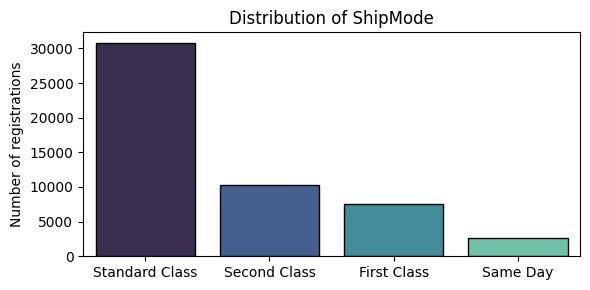

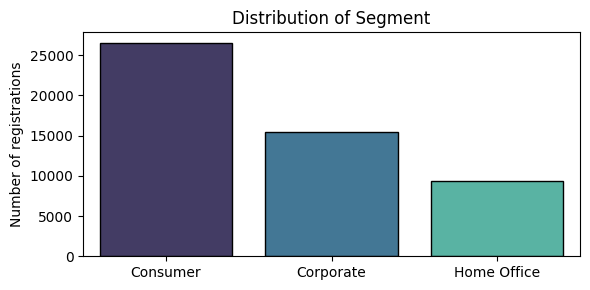

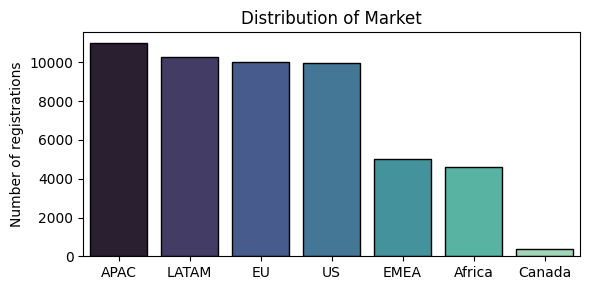

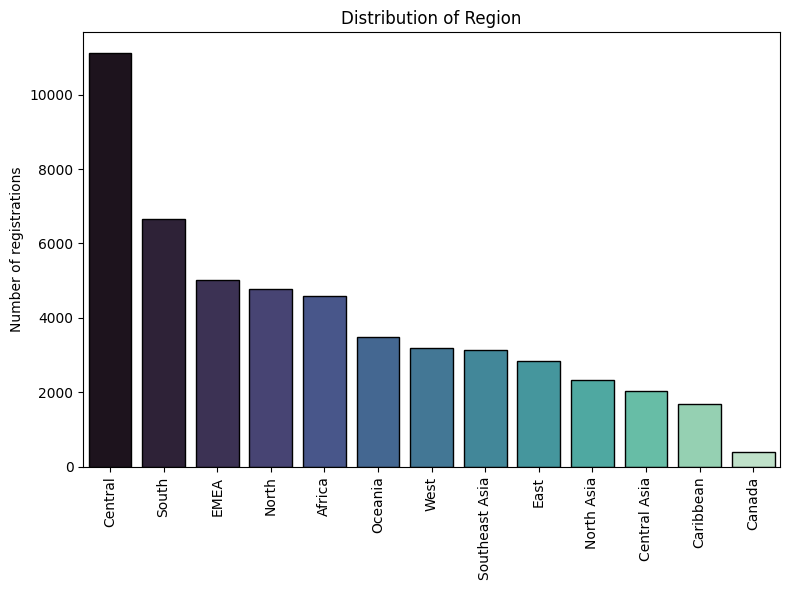

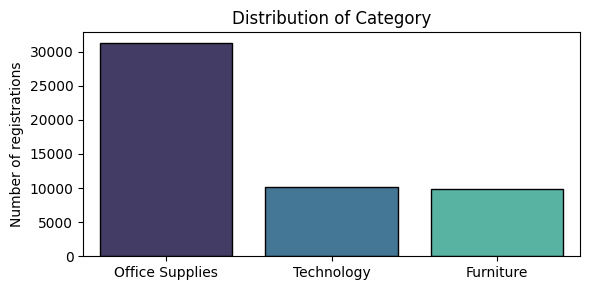

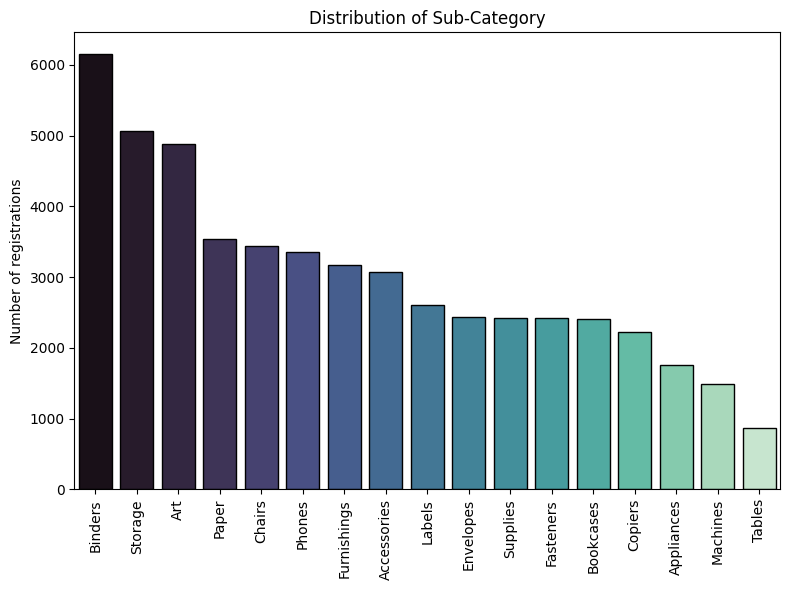

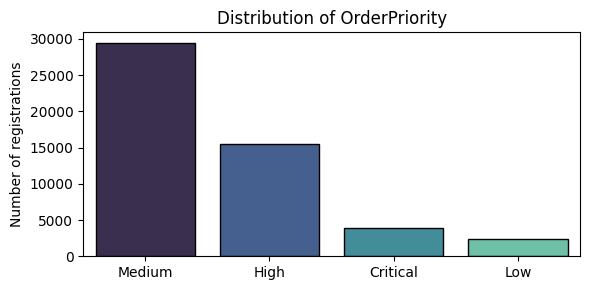

In [10]:
for col in ['ShipMode', 'Segment', 'Market', 'Region', 'Category', 'Sub-Category', 'OrderPriority']:


    if df[col].nunique() > 10:
        rot = 90
        size = (8, 6)

    else: 
        rot = 0
        size = (6, 3)

    plot_categoric_distribution(df, col, size=size, rotation=rot)

`OrderID`: Order identifier. We observe several orders with the same entry, possibly containing different transactions. There are a total of 25,035 orders.

`OrderDate`: Dates consist of several transactions, possibly linked to multiple orders and customers. There are a total of 1,430 different days.

`ShipDate`: Similar to the previous field, dates consist of several transactions, possibly linked to multiple orders and customers. There are a total of 1,464 different days.

`ShipMode`: There are 4 shipping modes in total. 60% of shipments are carried out via `StandardClass`, while only 5% correspond to `Same Day`, which could be considered the most urgent option.

`CustomerID`: Unique identifier for each customer. There are a total of 1,590 different customers.

`CustomerName`: Name of each customer. In this case, there are only 795 unique names. This suggests that different customers may have the same name, which is perfectly plausible, especially for common names. We will remove this column since we will retain the information from the IDs.

`Segment`: Segment to which each transaction belongs. There are 3 options: `Consumer`, `Corporate`, `Home Office`, with `Consumer` being the most frequent, representing 52% of the entries. We will need to examine if this is a characteristic of customer types.

`City`: City where the transaction takes place. There are a total of 3,635 different cities.

`State`: State where the transaction takes place. There are a total of 1,094 different states.

`Country`: Country where the transaction takes place. There are a total of 147 countries.

`Market`: The different markets in which transactions occur. There are a total of 7 markets encompassing the mentioned countries.

`Region`: The global or continental region where the transaction occurs. There are a total of 13 different regions.

`ProductID`: Unique identifier for each product. There are a total of 10,292 products.

`Category`: The category to which the product belongs. There are three different options: `Office Supplies`, `Technology`, and `Furniture`.

`Sub-category`: The subcategory to which the products belong. There are 17 different subcategories.

`ProductName`: Name of the product. There are 3,788 different names, so it is possible that different products (with different identifiers) have the same name.

`OrderPriority`: Order priority among 4 available options: `Medium`, `High`, `Critical`, `Low`.

## Outliers

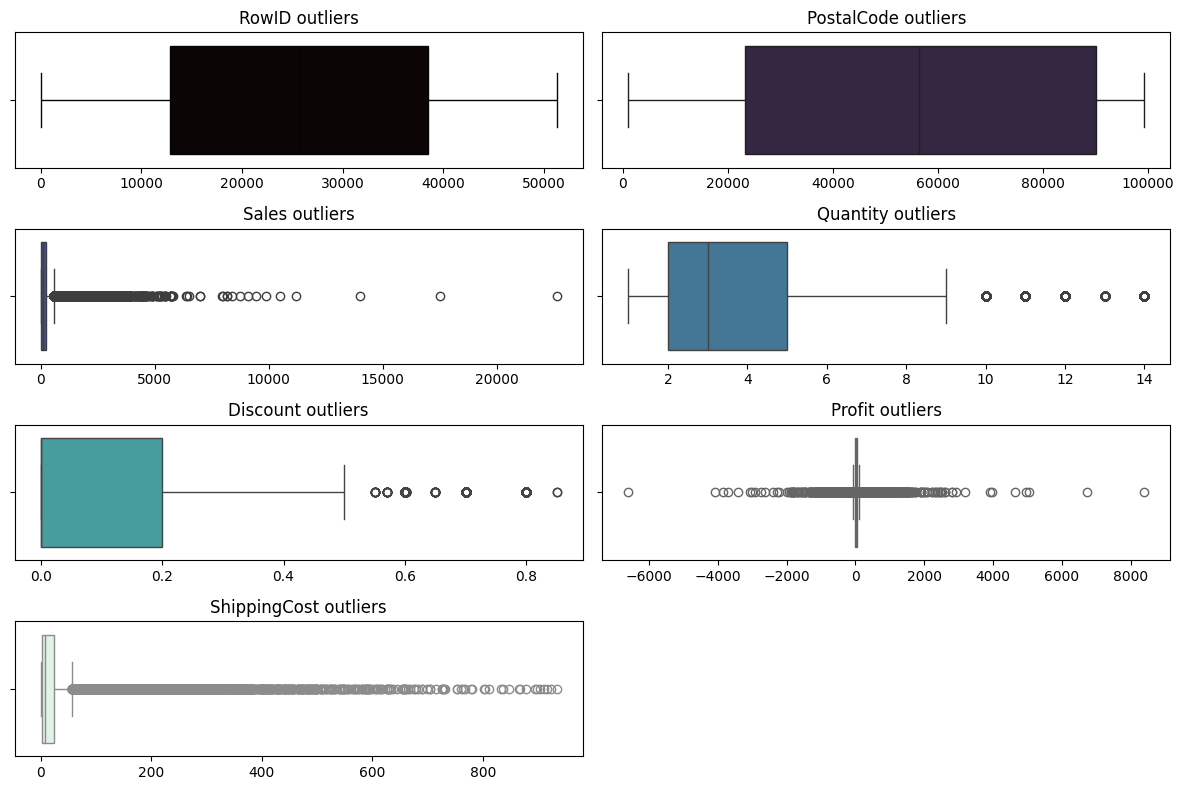

In [11]:
plot_outliers(df, size = (12, 8))

* `RowID`: No outliers are observed in this variable since it is a unique identifier, and all values appear to be evenly distributed within the expected range.

* `PostalCode`: There are no obvious outliers in this variable. Although there may be null values previously mentioned, the numerical data is uniformly distributed. In any case, this variable is not of interest to us.

* `Sales`: This variable shows a significant number of outliers in the upper range (sales greater than approximately 5,000). This aligns with the described high dispersion, where some transactions reach very high values.

* `Quantity`: There are outliers in transactions involving quantities greater than 10. Most operations are concentrated between 2 and 6 units.

* `Discount`: There are some outliers, especially for discounts over 50%. Most of the data is concentrated around low discounts (close to 0–20%).

* `Profit outliers`: Profits exhibit a large number of outliers at both extremes. Significant losses (up to -6,600) and high profits (up to 8,400) are observed. This also reflects the wide dispersion mentioned earlier.

* `ShippingCost`: Outliers are evident in shipments with costs exceeding 200. Most shipping costs fall within a narrow range close to 0.

Outlier observations may represent valid but unusual transactions or could result from data errors that require cleaning.

### Multivariate outliers

Let's examine the top 0.1% of the most outlying values according to the `LocalOutlierFactor` and `IsolationForest` methods.

In [12]:
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'ShippingCost']

In [13]:
df_outliers_lof = find_outliers(df, num_cols, method="lof", contamination=0.001)[0]

df_outliers_lof[df_outliers_lof['outlier'] == -1].head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,outlier
9,40936,CA-2012-116638,28-01-2012,31-01-2012,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,4297.644,13,0.4,-1862.3124,865.74,Critical,-1
17,12069,ES-2014-1651774,08-09-2014,14-09-2014,Standard Class,PJ-18835,Patrick Jones,Corporate,Prato,Tuscany,...,Office Supplies,Appliances,"Hoover Stove, Red",7958.580,14,0.0,3979.0800,778.32,Low,-1
37,31980,US-2014-168116,05-11-2014,05-11-2014,Same Day,GT-14635,Grant Thornton,Corporate,Burlington,North Carolina,...,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904,674.82,High,-1
45,35395,CA-2011-116904,23-09-2011,28-09-2011,Standard Class,SC-20095,Sanjit Chand,Consumer,Minneapolis,Minnesota,...,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755,655.61,Medium,-1
110,35574,US-2013-107440,17-04-2013,21-04-2013,Standard Class,BS-11365,Bill Shonely,Corporate,Lakewood,New Jersey,...,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930,7,0.0,2365.9818,516.91,Medium,-1


In [14]:
df_outliers_ifo = find_outliers(df, num_cols, method="ifo", contamination=0.001)[0]

df_outliers_ifo[df_outliers_ifo['outlier'] == -1].head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,outlier
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,-1
7,31192,IN-2012-86369,14-04-2012,18-04-2012,Standard Class,MB-18085,Mick Brown,Consumer,Hamilton,Waikato,...,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.840,6,0.0,996.4800,878.38,High,-1
8,40155,CA-2014-135909,14-10-2014,21-10-2014,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,...,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,5083.960,5,0.2,1906.4850,867.69,Low,-1
9,40936,CA-2012-116638,28-01-2012,31-01-2012,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,4297.644,13,0.4,-1862.3124,865.74,Critical,-1
12,45794,SA-2011-1830,27-12-2011,29-12-2011,Second Class,MM-7260,Magdelene Morse,Consumer,Jizan,Jizan,...,Technology,Phones,"Cisco Smart Phone, with Caller ID",2616.960,4,0.0,1151.4000,832.41,Critical,-1


Analyzing the outliers one by one, some entries seem somewhat unusual; however, we cannot ensure that any are erroneous, so we will keep them.

## Plot correlation matrix

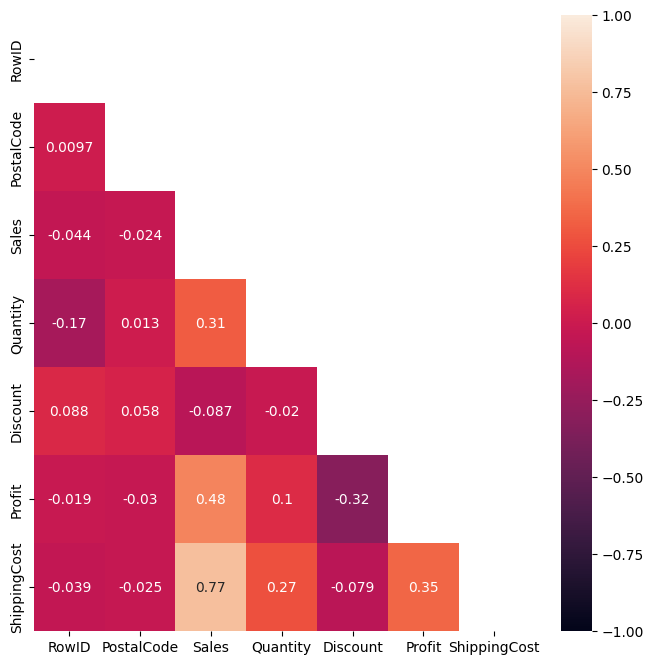

In [15]:
plot_correlation_matrix(df, size = (8, 8))

* There is a significant positive correlation between `Sales` and `ShippingCost`. This suggests that higher sales volumes are associated with higher shipping costs, which makes sense given that shipping more products or more expensive products tends to cost more.

* There is a moderate positive correlation between `Sales` and `Quantity`. This indicates that, while not a very strong relationship, larger quantities are generally associated with higher sales.

* There is a moderate positive correlation between `Profit` and `Sales`. This implies that higher sales tend to generate more profits.

* There is a moderate negative correlation between `Profit` and `Discount`. This suggests that applying discounts negatively affects profits, which is expected when reducing product prices.

## Groupings by categorical variables

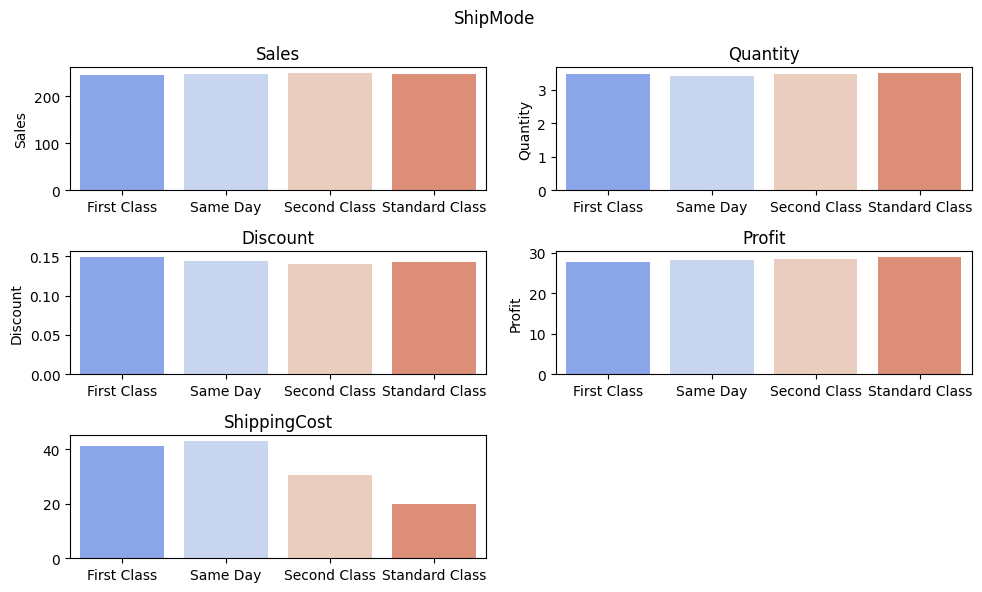

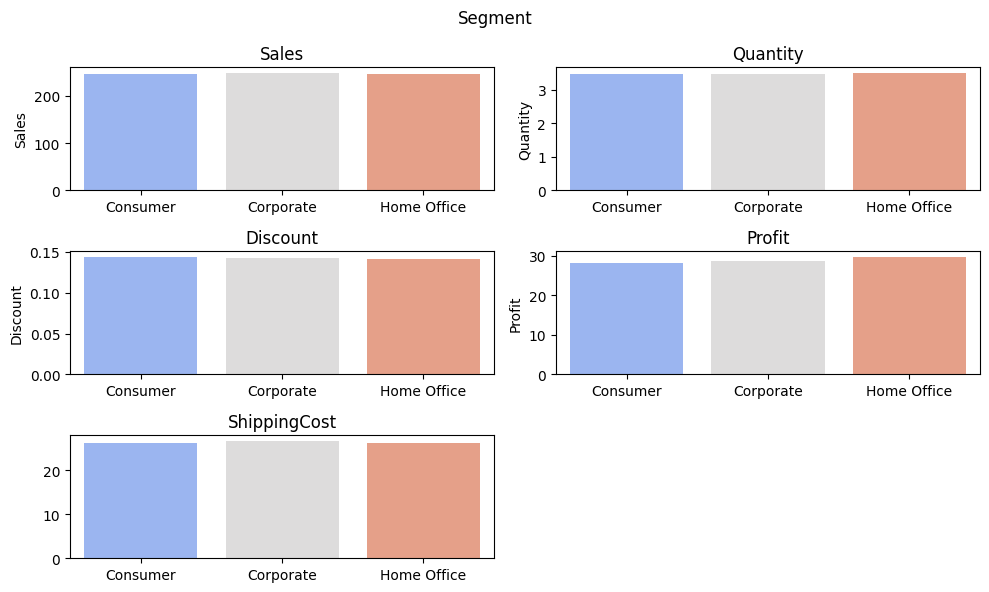

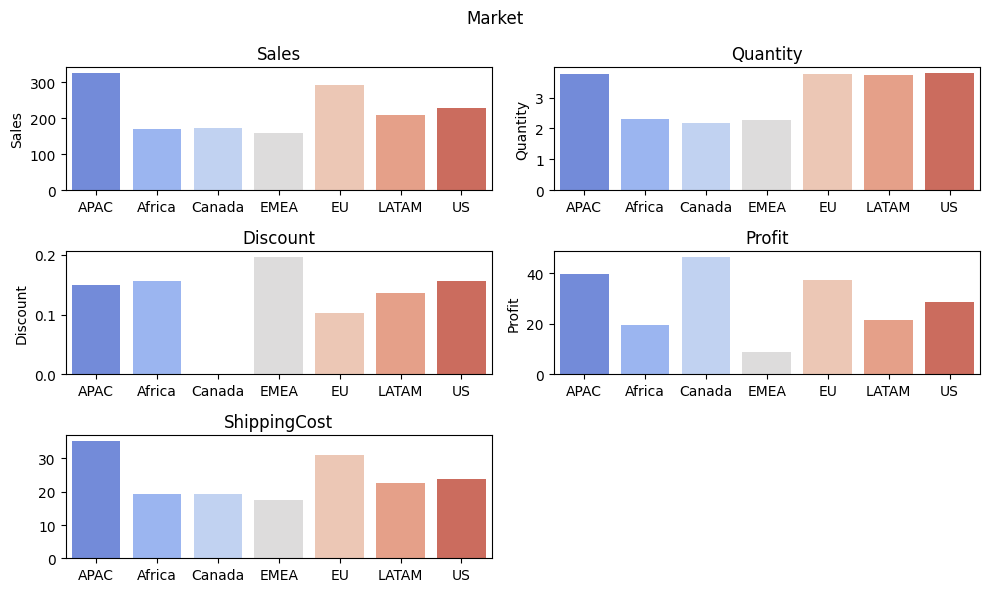

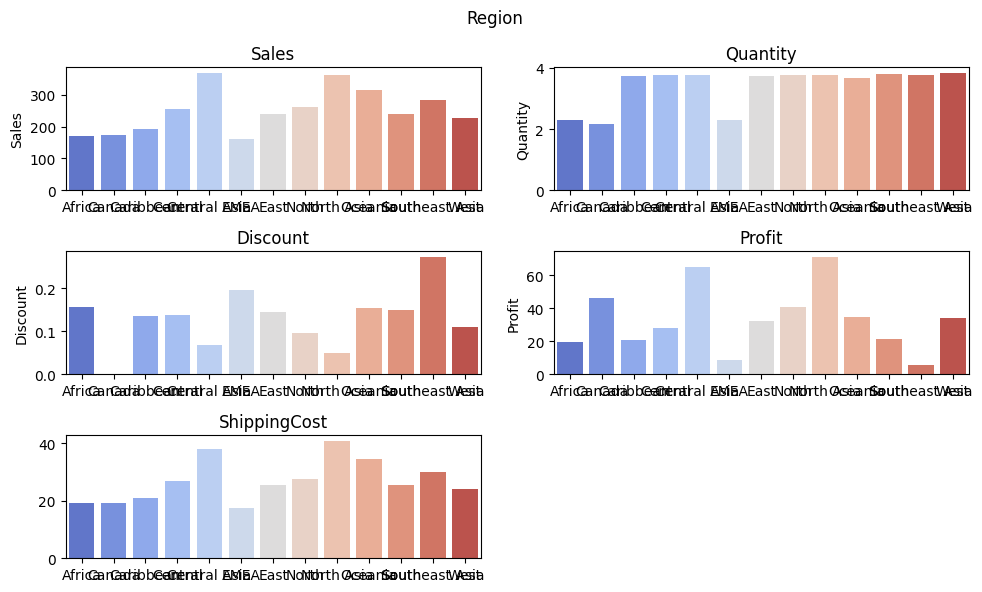

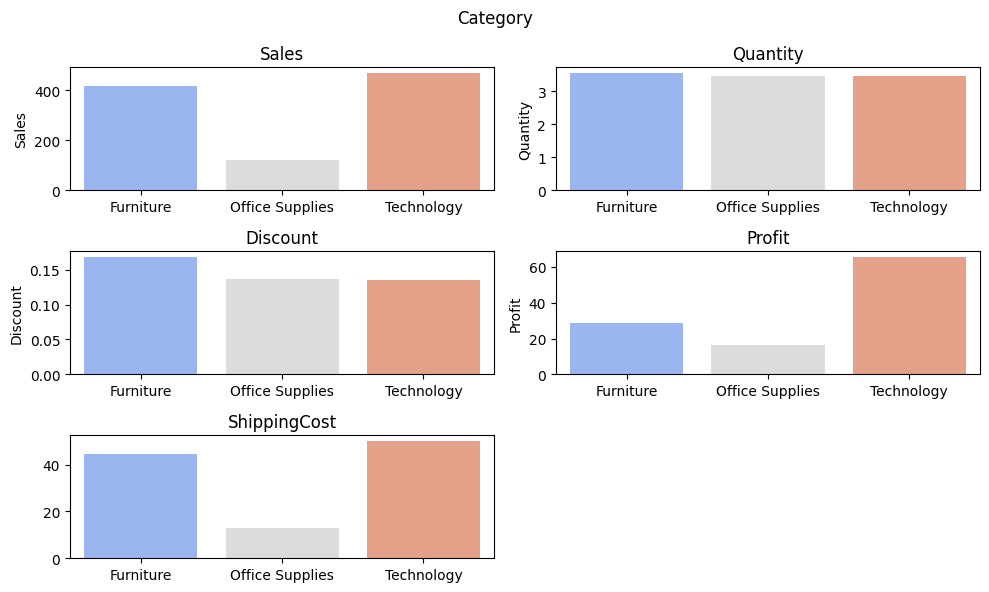

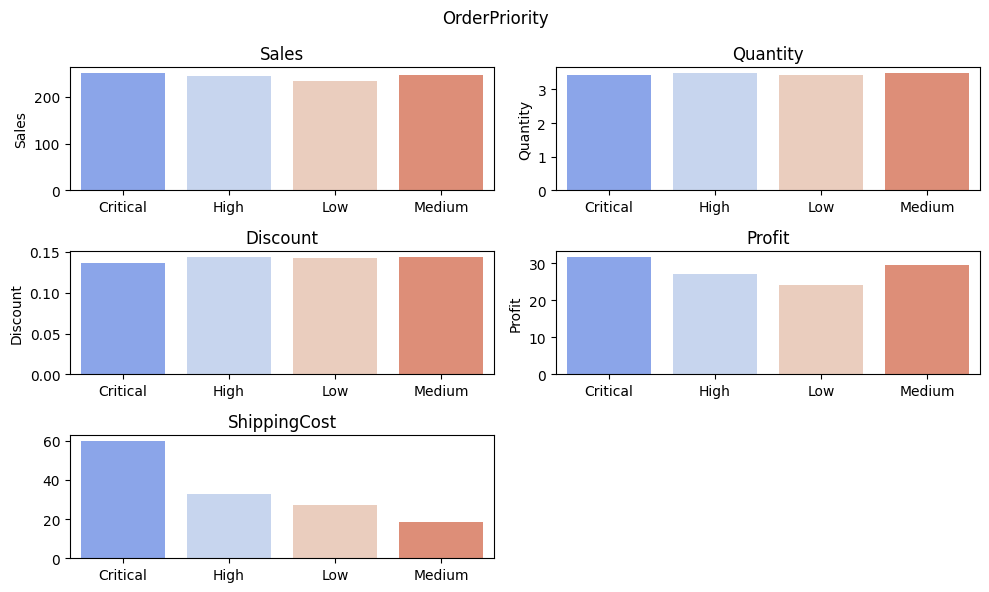

In [16]:
for col in ['ShipMode', 'Segment', 'Market', 'Region', 'Category', 'OrderPriority']:

    plot_groupby(df, col, num_cols, size=(10, 6), method='mean')

* `ShipMode` does not appear to have differences between its categories except for `ShippingCost`, which has higher values in the higher-priority categories.

* `Segment` does not seem to have differences among its categories.

* `Market` shows that APAC has the best metrics but also a higher `ShippingCost` than other markets. Canada has the highest average `Profit` and stands out for having no discounts.

* `Category` indicates that Office Supplies has the lowest `ShippingCost` but also generates fewer sales and provides less profit, while Technology shows the opposite.

* `OrderPriority` does not show significant differences except in `ShippingCost` and `Profit`, where critical priority leads.

---

# Column management

Since `RowID` is a unique identifier, we will set it as the index.

`PostalCode` had a large number of nulls, and its value does not provide much information due to the wide distribution of countries.

In [17]:
df.set_index('RowID', inplace=True)
df.drop(columns='PostalCode', inplace=True)

## Dates

We convert the dates to DateTime format.

In [18]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['ShipDate'] = pd.to_datetime(df['ShipDate'])

We create a column to calculate the shipping time for each order.

In [19]:
df['TimeToShip'] = (df['ShipDate'] - df['OrderDate'])

value_counts(df, 'TimeToShip')

The number of unique values for this category is 8


,count,proportion
TimeToShip,,
4 days,14434,0.28
5 days,11221,0.22
2 days,7026,0.14
6 days,6255,0.12
3 days,5035,0.10
7 days,3057,0.06
0 days,2600,0.05
1 days,1662,0.03


We observe that the most common shipping times are 4 or 5 days. The maximum shipping time is one week (7 days). Naturally, there are no orders shipped before they are registered.

In [20]:
print(f"The first day is {df['OrderDate'].dt.date.min()} and last {df['OrderDate'].dt.date.max()}.")

The first day is 2011-01-01 and last 2014-12-31.


The data spans from January 1, 2011, to December 31, 2014. Let’s analyze the temporal trends of `Sales` and `Profit`.

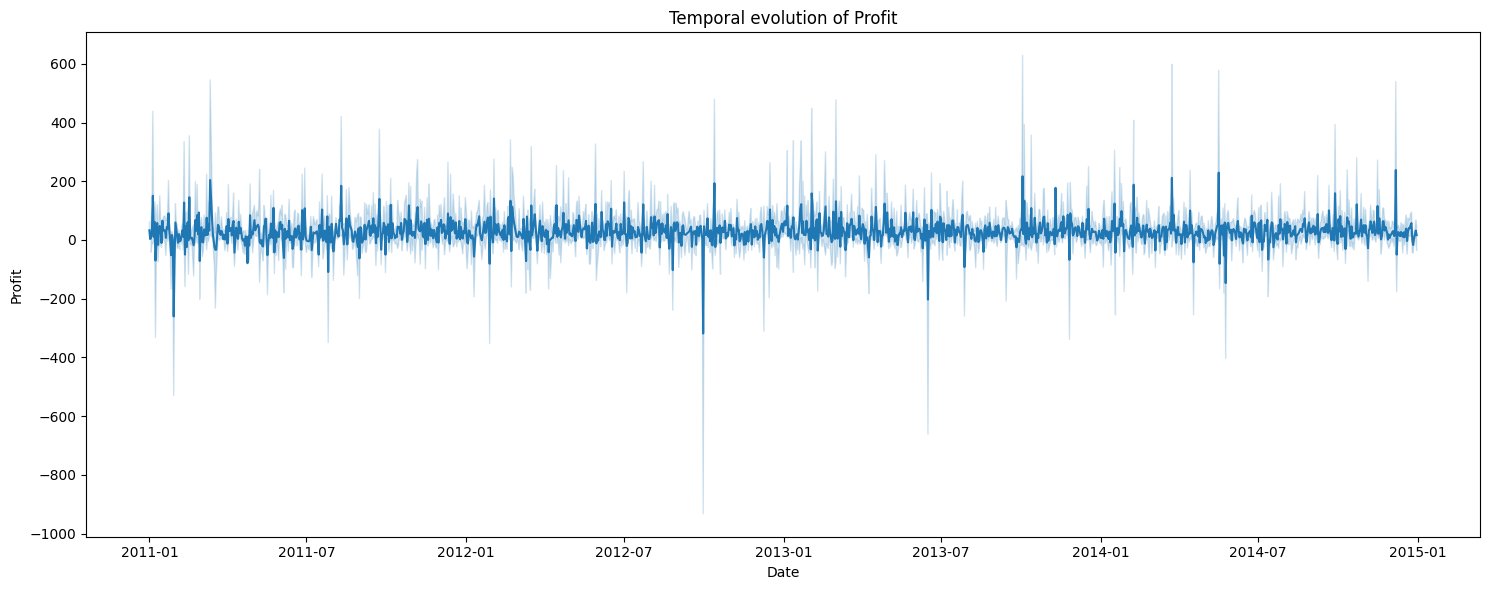

In [21]:
plot_temporal_evolution(df, 'Profit', 'OrderDate')

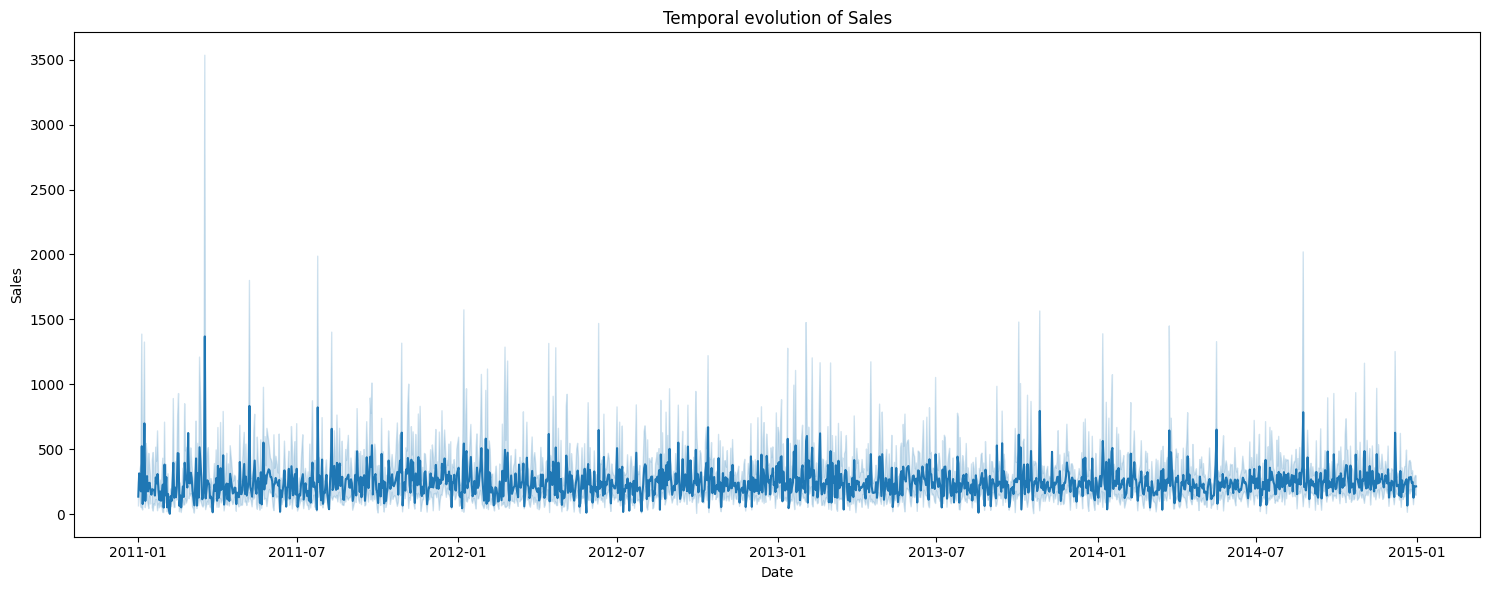

In [22]:
plot_temporal_evolution(df, 'Sales', 'OrderDate')

There are no noticeable trends or patterns in the temporal evolution, except for occasional spikes (which do not seem to follow any pattern) and general noise.

## Customer information

Let’s analyze the customers in greater detail.

Let’s verify if there is a proper correspondence between the ID's and the names.

In [23]:
df[['CustomerID', 'CustomerName']].value_counts().reset_index().sort_values(by='CustomerName').head(10)

,CustomerID,CustomerName,count
18,AB-10015,Aaron Bergman,77
1192,AB-15,Aaron Bergman,12
570,AH-10030,Aaron Hawkins,44
1208,AH-30,Aaron Hawkins,12
507,AS-10045,Aaron Smayling,47
1132,AS-45,Aaron Smayling,13
1216,AB-60,Adam Bellavance,11
259,AB-10060,Adam Bellavance,57
132,AH-10075,Adam Hart,64
884,AH-75,Adam Hart,20


In [24]:
df[['CustomerID', 'CustomerName']].value_counts().reset_index().sort_values(by='CustomerName').tail(10)

,CustomerID,CustomerName,count
1475,XP-11865,Xylona Preis,6
320,XP-21865,Xylona Preis,55
1415,YS-11880,Yana Sorensen,8
337,YS-21880,Yana Sorensen,54
412,YC-21895,Yoseph Carroll,51
1514,YC-11895,Yoseph Carroll,5
6,ZC-21910,Zuschuss Carroll,84
1587,ZC-11910,Zuschuss Carroll,1
722,ZD-21925,Zuschuss Donatelli,36
942,ZD-11925,Zuschuss Donatelli,18


It seems quite clear that several people with different IDs are actually the same, as all names are repeated twice, and the IDs follow a similar pattern. The reason appears to be that these IDs are poorly written rather than randomly distributed, as the relationship would not otherwise be so evident.

Let’s resolve the issue with the IDs. They seem to start with the initials of the customer's first and last names, followed by a number. This number matches in the last 2 or 3 digits, while the remaining digits are either missing or differ by one digit.

In [25]:
def simplify_customer_id(customer_id):
    # Split prefix and number
    prefix, number = customer_id.split("-")
    # Take last 3 figures, filling up with zeros if needed
    simplified_number = f"{int(number):03d}"[-3:]
    # Rebuild simplified ID
    return f"{prefix}-{simplified_number}"

df["CustomerID"] = df["CustomerID"].apply(simplify_customer_id)

In [26]:
df[['CustomerID', 'CustomerName']].value_counts().reset_index().sort_values(by='CustomerName').tail(10)

,CustomerID,CustomerName,count
687,VG-790,Vivek Gonzalez,50
469,VG-805,Vivek Grady,61
774,VS-820,Vivek Sundaresam,40
785,VM-835,Vivian Mathis,36
59,WB-850,William Brown,84
470,XP-865,Xylona Preis,61
450,YS-880,Yana Sorensen,62
570,YC-895,Yoseph Carroll,56
53,ZC-910,Zuschuss Carroll,85
621,ZD-925,Zuschuss Donatelli,54


We see that the issue is already resolved, so we can directly use `CustomerID` as the identifier and remove the name.

In [27]:
df.drop(columns='CustomerName', inplace=True)

### Customer Dataframe

We create a new dataframe for the customers. First, let’s check which variables make sense to include.

#### `Segment`

We check whether each customer is indeed assigned to a single segment.

In [28]:
df.groupby('CustomerID')['Segment'].nunique().sort_values(ascending=False).head(1)

CustomerID
AA-315    1
Name: Segment, dtype: int64

We observe that the customer with the most different segments only has one (like all customers), so we conclude that each customer has a unique relationship with a single segment.

#### `Locations`

Let’s examine the variables related to locations: `City`, `State`, `Country`, `Market`, `Region`.

Let's check City


count    795.000000
mean      31.350943
std        5.210081
min       13.000000
25%       28.000000
50%       31.000000
75%       35.000000
max       47.000000
Name: City, dtype: float64

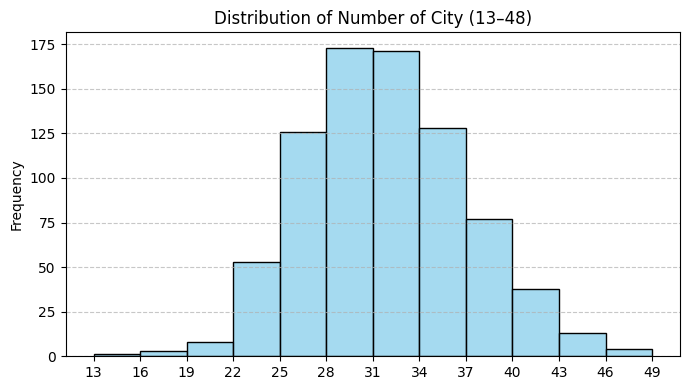

Let's check State


count    795.000000
mean      29.373585
std        4.903611
min       13.000000
25%       26.000000
50%       29.000000
75%       33.000000
max       44.000000
Name: State, dtype: float64

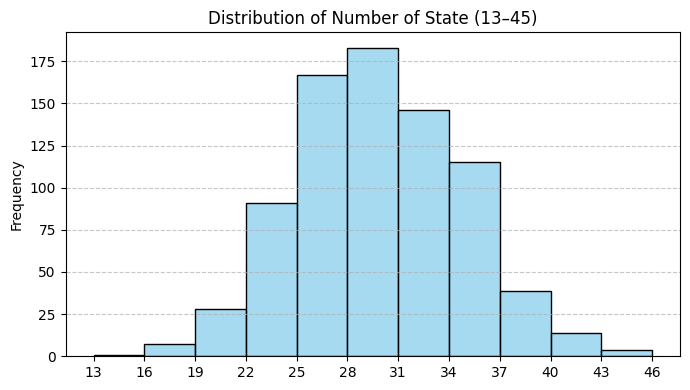

Let's check Country


count    795.000000
mean      19.748428
std        3.376778
min        8.000000
25%       17.000000
50%       20.000000
75%       22.000000
max       32.000000
Name: Country, dtype: float64

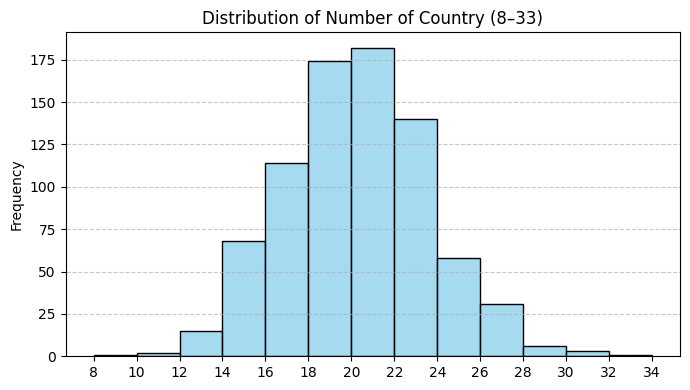

Let's check Market


count    795.000000
mean       6.128302
std        0.500520
min        5.000000
25%        6.000000
50%        6.000000
75%        6.000000
max        7.000000
Name: Market, dtype: float64

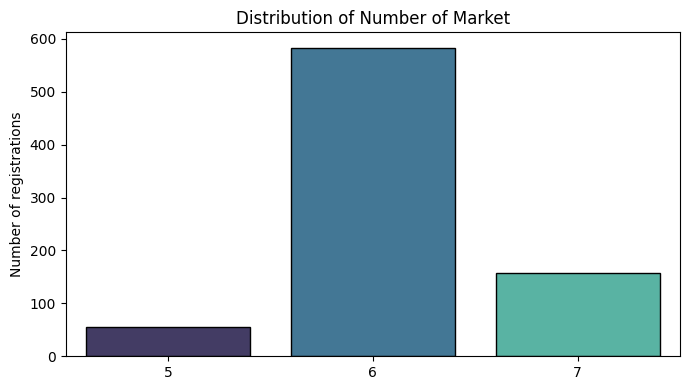

Let's check Region


count    795.000000
mean      10.661635
std        1.164104
min        6.000000
25%       10.000000
50%       11.000000
75%       11.000000
max       13.000000
Name: Region, dtype: float64

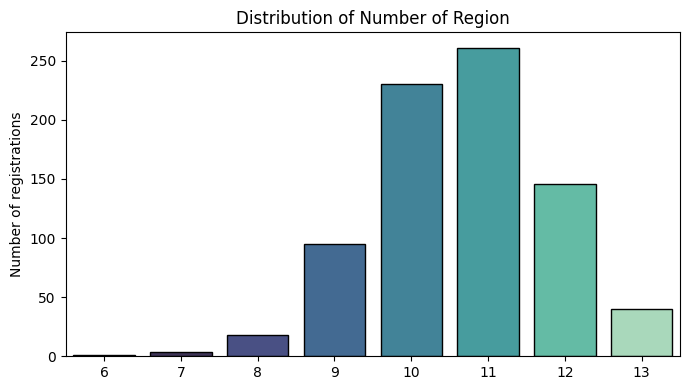

In [29]:
columns = ['City', 'State', 'Country', 'Market', 'Region']

for col in columns:

    print(f"Let's check {col}")
    display(df.groupby('CustomerID')[col].nunique().describe())

    quick_plot_numeric(df.groupby('CustomerID')[col].nunique().reset_index().rename(columns={col: f'Number of {col}'}), f'Number of {col}', rotation=0, size=(7,4))


We are unsure if these locations refer to where each customer operates from or where they conduct their orders. 

However, the values are quite high; it doesn’t seem realistic that the customer with the least geographic diversity has dealt with 13 cities, 13 states, 8 countries, 5 markets, and 6 regions. 

For this reason, we will not include these columns in the customer grouping.

Therefore, the columns we are interested in for each `CustomerID` are: 

- `Segment`  

- Number of unique `ProductID`  

- Total sum of `Sales`  

- Total sum of `Quantity`  

- Total sum of `Profit`  

- Total sum of `ShippingCost`

In [44]:
df_customers = df.groupby('CustomerID').agg({
    'Segment': 'first',
    'ProductID': 'nunique', 
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum',
    'ShippingCost': 'sum'
}).rename(columns={
    'Segment': 'Segment',
    'ProductID': 'NumberOfProducts',
    'Sales': 'TotalSales',
    'Quantity': 'TotalQuantity',
    'Profit': 'TotalProfit',
    'ShippingCost': 'TotalShippingCost'
})

In [45]:
df_customers.head()

,Segment,NumberOfProducts,TotalSales,TotalQuantity,TotalProfit,TotalShippingCost
CustomerID,,,,,,
AA-315,Consumer,50,15990.66900,165,983.25650,1451.95
AA-375,Consumer,55,6538.68700,169,754.91940,1022.62
AA-480,Consumer,48,19759.08278,175,2071.08818,1815.27
AA-645,Consumer,91,17312.21470,302,2443.09300,1961.27
AB-015,Consumer,88,24644.62750,301,4683.20800,3128.31


In [46]:
df_customers.to_csv("../data/processed/customers.csv")

---

## Product information

Let's analyze the customers in greater detail.

Let's verify if there is a proper correspondence between the ID's and the names.

In [32]:
df[['ProductID', 'ProductName']].value_counts().reset_index().sort_values(by='ProductName').head()

,ProductID,ProductName,count
7585,OFF-PA-10003424,"""While you Were Out"" Message Book, One Form per Page",3
6001,OFF-EN-10001137,"#10 Gummed Flap White Envelopes, 100/Box",4
6185,OFF-EN-10002312,#10 Self-Seal White Envelopes,4
2218,OFF-EN-10004483,"#10 White Business Envelopes,4 1/8 x 9 1/2",7
8543,OFF-EN-10000781,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",2


In [33]:
df[['ProductID', 'ProductName']].value_counts().reset_index().sort_values(by='ProductName').tail()

,ProductID,ProductName,count
5001,TEC-PH-10001300,"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",5
4529,TEC-PH-10002583,iOttie HLCRIO102 Car Mount,5
8082,TEC-PH-10000127,iOttie XL Car Mount,2
1782,TEC-PH-10003589,invisibleSHIELD by ZAGG Smudge-Free Screen Protector,7
2519,TEC-PH-10002726,netTALK DUO VoIP Telephone Service,7


In this case, something similar happens with customers. The columns `ProductName` and `ProductID` do not seem to have a unique relationship. 

However, it is more challenging to determine if this is an error. It is possible for the same product to have multiple IDs and the same name if there are different versions. 

Since there is no clear pattern, as there was with customers, we will assume that the IDs uniquely identify the products correctly. Now we can drop `ProductName` column.

In [84]:
df.drop(columns='ProductName', inplace=True)

### Product dataframe

We create a new dataframe for the products. First, let’s check which variables make sense to include.

#### `Category` and `Sub-Category`

Let’s verify that each product is indeed assigned to a single category and subcategory.

In [34]:
df.groupby('ProductID')['Category'].nunique().sort_values(ascending=False).head(2)

ProductID
FUR-ADV-10000002    1
OFF-ST-10001172     1
Name: Category, dtype: int64

In [35]:
df.groupby('ProductID')['Sub-Category'].nunique().sort_values(ascending=False).head(2)

ProductID
OFF-AVE-10002102    2
FUR-ADV-10000002    1
Name: Sub-Category, dtype: int64

We observe that categories are unique for each product, and subcategories are as well, except for one product that appears under two different subcategories. 

We will use the first occurrence of the subcategory for grouping, thereby ignoring this exception.

Let’s analyze the distribution of the number of products.

In [36]:
df.groupby('ProductID')[['Category', 'Sub-Category']].first().groupby('Category')['Sub-Category'].value_counts()

Category         Sub-Category
Furniture        Furnishings     684
                 Chairs          619
                 Bookcases       559
                 Tables          366
Office Supplies  Paper           781
                 Binders         742
                 Art             673
                 Storage         648
                 Envelopes       585
                 Labels          583
                 Fasteners       571
                 Appliances      558
                 Supplies        548
Technology       Phones          692
                 Accessories     664
                 Copiers         520
                 Machines        499
Name: count, dtype: int64

Let's create an illustrative chart.

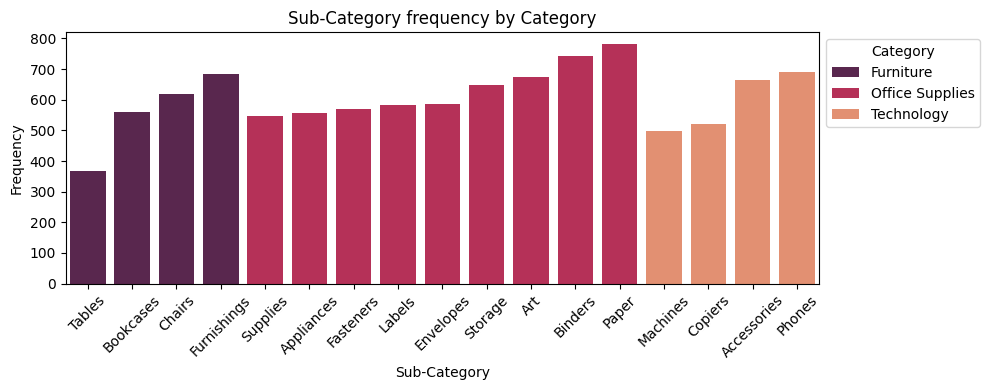

In [37]:
frequencies = (
    df.groupby('ProductID')[['Category', 'Sub-Category']]
    .first()
    .groupby(['Category', 'Sub-Category'])
    .size()
    .reset_index(name='Frequency')
)

plt.figure(figsize=(10, 4))
sns.barplot(
    data=frequencies,
    x='Sub-Category',
    y='Frequency',
    hue='Category',
    order=frequencies.sort_values(by=['Category', 'Frequency'])['Sub-Category'],
    palette='rocket'
)

plt.title('Sub-Category frequency by Category')
plt.xlabel('Sub-Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

We see that each subcategory belongs to a different category and that the distribution of products is more or less homogeneous, at least in terms of order of magnitude.

Therefore, the columns we are interested in for each `ProductID` are: 

- `Category`

- `Sub-Category`

- Number of unique `CustomerID`  

- Total sum of `Sales`  

- Total sum of `Quantity`  

- Total sum of `Profit`  

- Total sum of `ShippingCost`

In [42]:
df_products = df.groupby('ProductID').agg({
    'Category': 'first',
    'Sub-Category': 'first',
    'CustomerID': 'nunique', 
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum',
    'ShippingCost': 'sum'
}).rename(columns={
    'Category': 'Category',
    'Sub-Category': 'Sub-Category',
    'CustomerID': 'NumberOfCustomers',
    'Sales': 'TotalSales',
    'Quantity': 'TotalQuantity',
    'Profit': 'TotalProfit',
    'ShippingCost': 'TotalShippingCost'
})


In [47]:
df_products.head()

,Category,Sub-Category,NumberOfCustomers,TotalSales,TotalQuantity,TotalProfit,TotalShippingCost
ProductID,,,,,,,
FUR-ADV-10000002,Furniture,Furnishings,2,159.120,3,60.390,10.14
FUR-ADV-10000108,Furniture,Furnishings,3,350.070,7,3.360,22.90
FUR-ADV-10000183,Furniture,Furnishings,8,974.832,31,-651.738,100.02
FUR-ADV-10000188,Furniture,Furnishings,5,124.950,7,4.200,16.53
FUR-ADV-10000190,Furniture,Furnishings,1,222.360,2,104.460,32.71


In [48]:
df_products.to_csv("../data/processed/products.csv")

## Order information

Now let’s analyze what happens with the orders. In this case, we only have `OrderID`, so we can check how many customers and products correspond to each one.

#### Customers per order

In [49]:
df_orders_customer = df.groupby('OrderID')['CustomerID'].nunique().sort_values(ascending=False).reset_index()

df_orders_customer.head()

,OrderID,CustomerID
0,IT-2014-1036058,4
1,ES-2014-3566095,4
2,ES-2013-4477863,4
3,ES-2014-4717877,4
4,IT-2014-4652290,3


In [50]:
value_counts(df_orders_customer, 'CustomerID')

The number of unique values for this category is 4


,count,proportion
CustomerID,,
1,24376,0.97
2,604,0.02
3,51,0.00
4,4,0.00


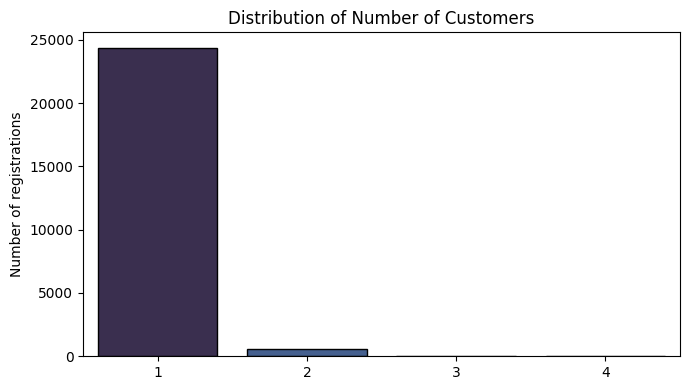

In [80]:
quick_plot_numeric(df_orders_customer.rename(columns={'CustomerID': f'Number of Customers'}), f'Number of Customers', rotation=0, size=(7,4))

The majority of orders correspond to a single customer. However, approximately 3% of orders have more than one customer assigned based on the transaction.  

Without additional information about the nature of the business, it is difficult to determine whether this might be an error or if it is indeed possible. We will omit this information.

#### Products per order

In [56]:
df_orders_product = df.groupby('OrderID')['ProductID'].nunique().sort_values(ascending=False).reset_index()

df_orders_product.head()

,OrderID,ProductID
0,CA-2014-100111,14
1,NI-2014-8880,13
2,TO-2014-9950,13
3,MX-2014-166541,13
4,IN-2013-42311,13


In [57]:
value_counts(df_orders_product, 'ProductID').head()

The number of unique values for this category is 14


,count,proportion
ProductID,,
1,12265,0.49
2,6217,0.25
3,3211,0.13
4,1630,0.07
5,806,0.03


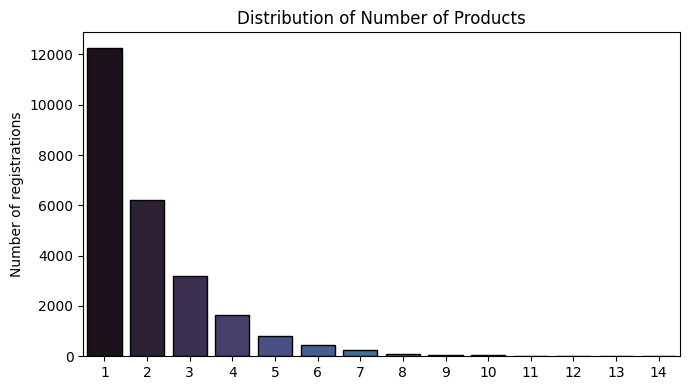

In [58]:
quick_plot_numeric(df_orders_product.rename(columns={'ProductID': f'Number of Products'}), f'Number of Products', rotation=0, size=(7,4))

In this case, half of the orders are associated with a single product, while 25% have two products, and the rest consist of three or more. This is reasonable, as orders often include multiple products.

#### Ship Mode per order

In [66]:
df_order_shipmode = df.groupby('OrderID')['ShipMode'].nunique().sort_values(ascending=False).reset_index()

df_order_shipmode.head()

,OrderID,ShipMode
0,ES-2013-4117792,3
1,ES-2013-1121754,3
2,ES-2014-4936686,3
3,ES-2014-4717877,3
4,ES-2013-1526338,3


In [76]:
value_counts(df_order_shipmode, 'ShipMode')

The number of unique values for this category is 3


,count,proportion
ShipMode,,
1,24637,0.98
2,390,0.02
3,8,0.00


Each order is associated with a single shipping mode in 98% of cases, while in the remaining 2%, there are two shipping modes, with a residual proportion of 8 orders having three different shipping modes.  

If each order consists of multiple transactions involving shipments, this could make sense. However, due to this imbalance, we will consider the first occurrence in these cases.

#### Priority per order

In [78]:
df_order_priority = df.groupby('OrderID')['OrderPriority'].nunique().sort_values(ascending=False).reset_index()

df_order_priority.head()

,OrderID,OrderPriority
0,ES-2012-5206109,3
1,TU-2014-7890,3
2,ES-2013-4968432,3
3,ES-2012-2674466,3
4,TU-2011-7850,3


In [79]:
value_counts(df_order_priority, 'OrderPriority')

The number of unique values for this category is 3


,count,proportion
OrderPriority,,
1,24653,0.98
2,369,0.01
3,13,0.00


Similarly to the previous case, each order is associated with a single priority mode in 98% of cases, while in the remaining 2%, there are two priority modes, with a residual proportion of 13 orders having three different priority modes.  

As with the previous case, if each order consists of multiple transactions involving shipments, this could make sense. Due to this imbalance, we will consider the first occurrence in these cases.

### Product dataframe

We create a new dataframe for the orders. The columns we are interested in for each `OrderID` are: 

- `ShipMode`

- `OrderPriority`

- Number of unique `ProductID`  

- Total sum of `Sales`  

- Total sum of `Quantity`  

- Total sum of `Profit`  

- Total sum of `ShippingCost`

In [81]:
df_orders = df.groupby('OrderID').agg({
    'ShipMode': 'first',
    'OrderPriority': 'first',
    'ProductID': 'nunique', 
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum',
    'ShippingCost': 'sum'
}).rename(columns={
    'ProductID': 'NumberOfProducts', 
    'Sales': 'TotalSales',
    'Quantity': 'TotalQuantity',
    'Profit': 'TotalProfit',
    'ShippingCost': 'TotalShippingCost'
})

In [82]:
df_orders.head()

,ShipMode,OrderPriority,NumberOfProducts,TotalSales,TotalQuantity,TotalProfit,TotalShippingCost
OrderID,,,,,,,
AE-2011-9160,Standard Class,Medium,2,161.082,8,-246.078,9.56
AE-2013-1130,Same Day,High,2,228.996,7,-236.964,60.18
AE-2013-1530,Second Class,High,2,23.634,3,-38.076,3.16
AE-2014-2840,First Class,Critical,1,42.480,1,-75.060,8.04
AE-2014-3830,Standard Class,Medium,6,281.502,16,-429.108,19.38


In [83]:
df_orders.to_csv("../data/processed/orders.csv")

---

VER SI AÑADIR ESTO O BORRAR

Veamos qué pasa con profit

In [91]:
df['Profit'] - (df['Sales'] - (df['Sales'] * df['Discount']) - df['ShippingCost'])

RowID
32298    -613.8955
26341   -2703.5905
25330   -2822.1929
13524   -1789.6390
47221   -1618.4000
           ...    
29002     -60.5900
35398      -1.1888
40470     -11.6792
9596      -11.0400
6147      -59.5800
Length: 51290, dtype: float64

In [60]:
df.groupby(['Market', 'Region'])['Region'].count()

Market  Region        
APAC    Central Asia      2048
        North Asia        2338
        Oceania           3487
        Southeast Asia    3129
Africa  Africa            4587
Canada  Canada             384
EMEA    EMEA              5029
EU      Central           5822
        North             2141
        South             2037
LATAM   Caribbean         1690
        Central           2972
        North             2644
        South             2988
US      Central           2323
        East              2848
        South             1620
        West              3203
Name: Region, dtype: int64